<a href="https://colab.research.google.com/github/D-Rosengren/Port-Folio-CALDISS-/blob/master/Port_folio_1_Final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Portfolio Tuesday

We will be using the turnover dataset 

https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv'

for this portfolio to do 3 things:

## Unsupervised ML

- Prepare the dataset (select the columns that are useful)
- Preprocess (Scale)
- Reduce dimensionality and perhaps make a scatterplot of the data
- Examine the reduced data

## Supervised ML

- Preprocess the data
- Try to predict "churn" using a simple model (Logistic Regression)
- Try a more advanced model (e.g. Random Forest)
- Evaluate your model
- Predict "satisfaction" (!!! This is a regression model)
- Evaluate the regression model



In [0]:
#import standart libraries and tools 
import pandas as pd
import seaborn as sns
import altair as alt
import numpy as np
import matplotlib.pyplot as plt 

In [0]:
# stardart import template - does not create a DataFrame yet (!) 
data = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

In [0]:
data.head


<bound method NDFrame.head of        satisfaction  evaluation  ...  department  salary
0              0.38        0.53  ...       sales     low
1              0.80        0.86  ...       sales  medium
2              0.11        0.88  ...       sales  medium
3              0.72        0.87  ...       sales     low
4              0.37        0.52  ...       sales     low
...             ...         ...  ...         ...     ...
14994          0.40        0.57  ...     support     low
14995          0.37        0.48  ...     support     low
14996          0.37        0.53  ...     support     low
14997          0.11        0.96  ...     support     low
14998          0.37        0.52  ...     support     low

[14999 rows x 10 columns]>

In [0]:
data = data.drop("department", axis=1)

In [0]:
salary_mapper = {'low':0, 'medium': 1, 'high': 2}
data['salary_recode']=data.salary.map(salary_mapper)
data['salary_recode'].unique()
data = data.drop('salary', axis=1 )
data.head()



,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary_recode
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


## Unsupervised machine learning 

In [0]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data)



In [0]:
pd.DataFrame(data_scaled, columns=data.columns).describe()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary_recode
count,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04,1.499900e+04
mean,-1.789799e-17,-4.257767e-16,-4.071089e-18,-4.978720e-16,-6.144617e-15,5.792368e-15,-3.049050e-14,1.110996e-14,7.034620e-15
std,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00,1.000033e+00
min,-2.102922e+00,-2.080478e+00,-1.462863e+00,-2.103471e+00,-1.026126e+00,-4.111653e-01,-5.589974e-01,-1.474118e-01,-9.333679e-01
25%,-6.951648e-01,-9.120042e-01,-6.515376e-01,-9.020633e-01,-3.412352e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,-9.333679e-01
50%,1.092680e-01,2.277508e-02,1.597876e-01,-2.103137e-02,-3.412352e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,6.360923e-01
75%,8.332576e-01,8.991306e-01,9.711129e-01,8.800240e-01,3.436553e-01,-4.111653e-01,-5.589974e-01,-1.474118e-01,6.360923e-01
max,1.557247e+00,1.658639e+00,2.593763e+00,2.181549e+00,4.452998e+00,2.432112e+00,1.788917e+00,6.783716e+00,2.205553e+00


## reduce Dimensionality 

In [0]:
# Import the module and instantiate a PCA object
from sklearn.decomposition import PCA
model = PCA(n_components=7) #We pick 7 as the number of components...just because (it's a 3rd of the columns available)

# Fit and transform the data
data_reduced = model.fit_transform(data_scaled)

In [0]:
# Make sure the data shape is as it should be
data_reduced.shape

(14999, 7)

In [0]:
plot_data = pd.DataFrame({'evr': model.explained_variance_ratio_, 'cumsum_evr': np.cumsum(model.explained_variance_ratio_)}).stack()

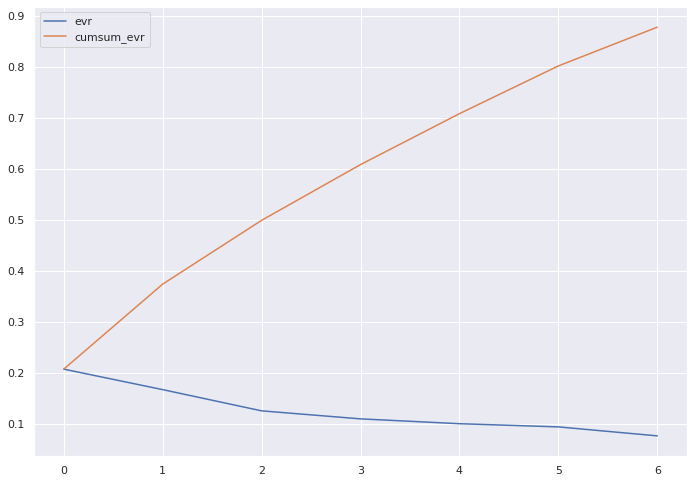

In [0]:
# how many features do we need? visualizing explanatory power 
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.lineplot(y = plot_data.values, x = plot_data.index.get_level_values(0), hue=plot_data.index.get_level_values(1))

In [0]:
# How mach "information" do we kick out?
model.explained_variance_ratio_.sum()

0.8778110711485282

In [0]:
pcscores = pd.DataFrame(data_reduced)
loadings = pd.DataFrame(model.components_, columns=data.columns)
loadings.index = ['PC'+str(i+1) for i in range(len(pcscores.columns))]

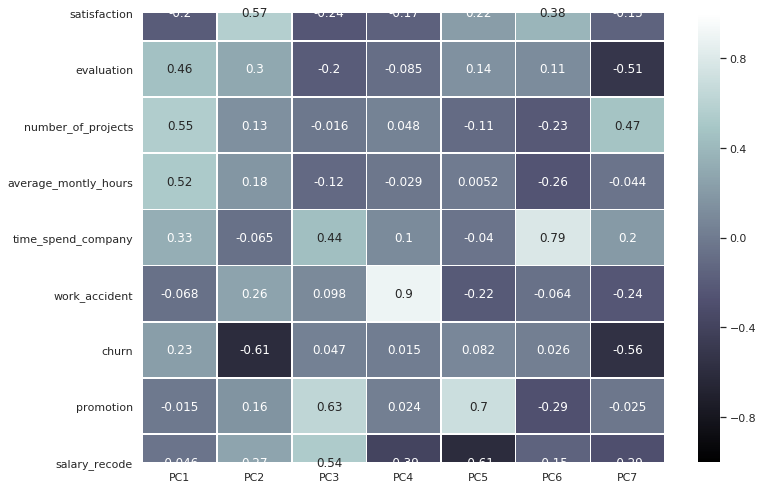

In [0]:
ax = sns.heatmap(loadings.transpose(), center=0, linewidths=0.5, 
                 cmap="bone", vmin=-1, vmax=1, annot=True)

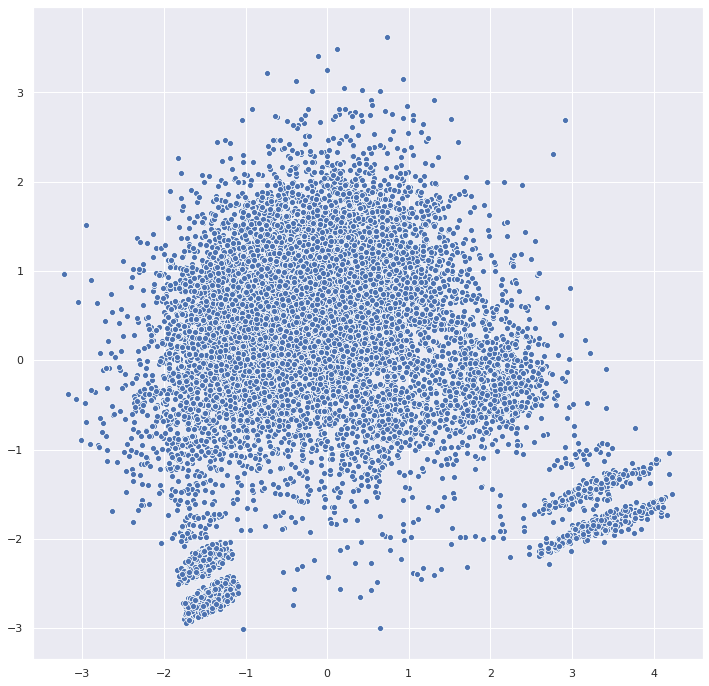

In [0]:
# Now we can plot in our points
plt.figure(figsize=(12,12))
g = sns.scatterplot(data_reduced[:,0], data_reduced[:,1],
                    legend='full', palette='viridis')

legend = g.get_legend()

## Unsupervised Machine Learning

Loading the data

In [0]:
# stardart import template - does not create a DataFrame yet (!) 
data_2 = pd.read_csv('https://github.com/CALDISS-AAU/sdsphd19_coursematerials/raw/master/data/turnover.csv')

Processign the data

In [0]:
data_2 = data_2.drop("department", axis=1)    #redefining the department and salary columns to create integers
salary_mapper = {'low':0, 'medium': 1, 'high': 2}
data_2['salary_recode']=data_2.salary.map(salary_mapper)
data_2['salary_recode'].unique()
data_2 = data_2.drop('salary', axis=1 )
data_2.head()

,satisfaction,evaluation,number_of_projects,average_montly_hours,time_spend_company,work_accident,churn,promotion,salary_recode
0,0.38,0.53,2,157,3,0,1,0,0
1,0.80,0.86,5,262,6,0,1,0,1
2,0.11,0.88,7,272,4,0,1,0,1
3,0.72,0.87,5,223,5,0,1,0,0
4,0.37,0.52,2,159,3,0,1,0,0


In [0]:
# defining the dependent variable [churn]
Y=data_2.churn

# defining the independent variables [non-churn variables]
X=data_2.loc[:, data_2.columns != 'churn']
X.head

<bound method NDFrame.head of        satisfaction  evaluation  ...  promotion  salary_recode
0              0.38        0.53  ...          0              0
1              0.80        0.86  ...          0              1
2              0.11        0.88  ...          0              1
3              0.72        0.87  ...          0              0
4              0.37        0.52  ...          0              0
...             ...         ...  ...        ...            ...
14994          0.40        0.57  ...          0              0
14995          0.37        0.48  ...          0              0
14996          0.37        0.53  ...          0              0
14997          0.11        0.96  ...          0              0
14998          0.37        0.52  ...          0              0

[14999 rows x 8 columns]>

Scaling the data

In [0]:
# Import K-fold crossvalidation
from sklearn.model_selection import cross_val_score

# Import Classification Report for later evaluation of performance
from sklearn.metrics import classification_report

In [0]:
#scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data_scaled = scaler.fit_transform(data_2)

In [0]:
# Apply the scaler to our X-features - the scalar transforms the Pandas to a Numpyarray which is important to make the data intelligible to the further operations below
X_scaled = scaler.fit_transform(X)



In [0]:
Y.shape

(14999,)

In [0]:
# Load and instantiate a LabelEncoder that will turn our text labels (regions into indices) - this is important to make regions (categories) intelligible to an algorithm
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# Transform labels into indices by passing y to the encoder (y_enc = encoded y) 
y_enc = encoder.fit_transform(Y)

In [0]:

# Split the data using the train_test_split module. We keep 20% of the data for testing (test_size) and use 80% to train the model
# Random state defined with an arbitrary number for reproducibility

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size = 0.2, random_state = 42)

Import regression analysis packages 


In [0]:
# Import and instantiate the model
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

# K-fold cross-validation (splitting the 80% into 5 chunks, using 4 to train and 1 to evaluate)
scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

# Model training
model.fit(X_train, y_train)

# Model performance on the test-set
print(model.score(X_test, y_test))

[0.79041667 0.79375    0.7925     0.79958333 0.7840767 ]
0.7833333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  Futur

Visualizing results 


In [0]:
# For that we need to install an updated version of the MLxtend library (it will make plotting of the confusion matrix easy)
!pip install -qq -U mlxtend

     |████████████████████████████████| 1.3MB 9.3MB/s 


In [0]:
# Import the confusion matrix plotter module
from mlxtend.plotting import plot_confusion_matrix

# We will also import sklearns confusion matrix module that will make it easy to produce a confusion matrix
# It's actually just a cross-tab of predicted vs. real values
from sklearn.metrics import confusion_matrix

In [0]:
# Performance evaluation using the classification_report

target_names = encoder.inverse_transform(list(set(y_test))) # get real region names back using inverse_transform

y_pred = model.predict(X_test) # predict from the testset

print(classification_report(y_test, y_pred)) #Print out the report

              precision    recall  f1-score   support

           0       0.82      0.92      0.87      2294
           1       0.57      0.33      0.42       706

    accuracy                           0.78      3000
   macro avg       0.69      0.63      0.64      3000
weighted avg       0.76      0.78      0.76      3000



Running a random forest analysis 

In [0]:
#import the random forest modelling 
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

scores = cross_val_score(model, X_train, y_train, cv = 5)
print(scores)

model.fit(X_train, y_train)
print(model.score(X_test, y_test))

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.98666667 0.98541667 0.98791667 0.99       0.99124635]
0.9843333333333333


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
